In [21]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

from sklearn.datasets import make_circles, make_classification, make_moons
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import multilabel_confusion_matrix
import seaborn as sns
from sklearn.preprocessing import Normalizer
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

import lightgbm as lgb

from sklearn.preprocessing import Normalizer
from sklearn.decomposition import PCA


In [23]:
import seaborn as sns
import matplotlib.pyplot as plt


#### Higgs EDA

In [124]:
df_higgs = pd.read_csv("/content/drive/MyDrive/00 UvA MASTER DATA SCIENCE /05. Applied Machine Learning /higgs_train.csv")
higgs_test = pd.read_csv("/content/drive/MyDrive/00 UvA MASTER DATA SCIENCE /05. Applied Machine Learning /benchmark-tabular-ml/higgs_test.csv")  # adjust path as necessary


In [25]:
df_higgs.head()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,138683,136.372,32.142,95.158,24.012,-999.000,-999.000,-999.000,2.650,24.012,...,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000,4.585780,b
1,164939,123.147,73.967,73.065,1.951,-999.000,-999.000,-999.000,3.181,1.951,...,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,-0.000,5.005938,b
2,103954,114.196,77.282,84.580,1.398,-999.000,-999.000,-999.000,2.808,1.398,...,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,-0.000,4.747560,b
3,220374,113.938,37.713,78.068,73.541,1.506,83.664,0.344,2.062,2.179,...,2,45.739,-1.707,2.192,38.358,-0.202,-3.017,84.097,0.018636,s
4,272861,-999.000,82.024,55.707,15.350,-999.000,-999.000,-999.000,1.943,15.350,...,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,-0.000,4.924326,b


#### Higgs EDA

In [125]:
data = df_higgs

# An overview of features

data.columns
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175000 entries, 0 to 174999
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   EventId                      175000 non-null  int64  
 1   DER_mass_MMC                 175000 non-null  float64
 2   DER_mass_transverse_met_lep  175000 non-null  float64
 3   DER_mass_vis                 175000 non-null  float64
 4   DER_pt_h                     175000 non-null  float64
 5   DER_deltaeta_jet_jet         175000 non-null  float64
 6   DER_mass_jet_jet             175000 non-null  float64
 7   DER_prodeta_jet_jet          175000 non-null  float64
 8   DER_deltar_tau_lep           175000 non-null  float64
 9   DER_pt_tot                   175000 non-null  float64
 10  DER_sum_pt                   175000 non-null  float64
 11  DER_pt_ratio_lep_tau         175000 non-null  float64
 12  DER_met_phi_centrality       175000 non-null  float64
 13 

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight
count,175000.000000,175000.000000,175000.000000,175000.000000,175000.000000,175000.000000,175000.000000,175000.000000,175000.000000,175000.000000,...,175000.000000,175000.000000,175000.000000,175000.000000,175000.000000,175000.000000,175000.000000,175000.000000,175000.000000,175000.000000
mean,225110.493577,-49.628612,49.325133,81.233778,57.918801,-708.004070,-600.483421,-708.941271,2.372299,18.925814,...,209.819631,0.979446,-348.062386,-399.054142,-399.062132,-691.944552,-708.705097,-708.699918,73.124907,1.648737
std,72145.054611,407.218564,35.357137,41.118403,63.731894,454.672731,658.960711,453.211529,0.783185,22.683781,...,126.381975,0.977010,532.962806,489.297453,489.291001,480.073109,453.577747,453.585577,98.028052,1.874832
min,100000.000000,-999.000000,0.000000,6.329000,0.000000,-999.000000,-999.000000,-999.000000,0.208000,0.000000,...,13.678000,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000,0.001502
25%,162570.500000,77.947750,19.306000,59.338750,14.060750,-999.000000,-999.000000,-999.000000,1.809000,2.841000,...,123.069500,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000,0.018636
50%,225152.500000,104.934000,46.657500,73.708000,38.514500,-999.000000,-999.000000,-999.000000,2.489000,12.227500,...,179.784500,1.000000,38.951500,-1.873000,-2.095000,-999.000000,-999.000000,-999.000000,40.506000,1.168049
75%,287590.250000,130.581250,73.628000,92.230000,79.256750,0.496000,83.633250,-4.564750,2.960000,27.563000,...,263.384000,2.000000,75.492000,0.436250,0.499000,33.738500,-2.447750,-2.265000,109.974000,2.407250
max,349999.000000,988.199000,594.287000,1329.913000,2834.999000,8.503000,4974.979000,16.648000,5.655000,2834.999000,...,2003.976000,3.000000,1120.573000,4.492000,3.141000,706.672000,4.500000,3.142000,1633.433000,7.822543


In [126]:
# drop EventId column -> just some Id we dont need
data = data.drop(['EventId'], axis=1)
test_data = higgs_test.drop(['EventId'], axis=1)

In [127]:
#check for null values

data.isnull().sum()

DER_mass_MMC                   0
DER_mass_transverse_met_lep    0
DER_mass_vis                   0
DER_pt_h                       0
DER_deltaeta_jet_jet           0
DER_mass_jet_jet               0
DER_prodeta_jet_jet            0
DER_deltar_tau_lep             0
DER_pt_tot                     0
DER_sum_pt                     0
DER_pt_ratio_lep_tau           0
DER_met_phi_centrality         0
DER_lep_eta_centrality         0
PRI_tau_pt                     0
PRI_tau_eta                    0
PRI_tau_phi                    0
PRI_lep_pt                     0
PRI_lep_eta                    0
PRI_lep_phi                    0
PRI_met                        0
PRI_met_phi                    0
PRI_met_sumet                  0
PRI_jet_num                    0
PRI_jet_leading_pt             0
PRI_jet_leading_eta            0
PRI_jet_leading_phi            0
PRI_jet_subleading_pt          0
PRI_jet_subleading_eta         0
PRI_jet_subleading_phi         0
PRI_jet_all_pt                 0
Weight    

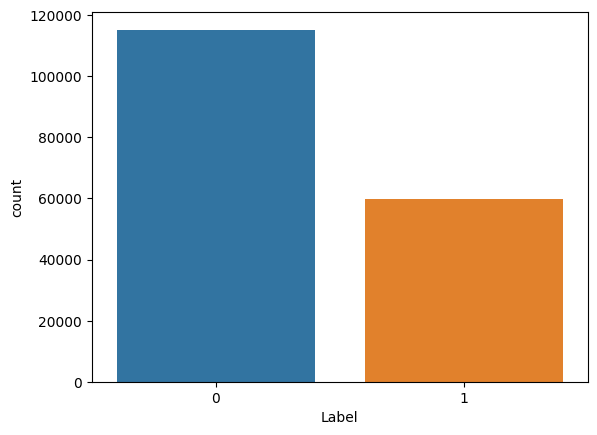

In [128]:
# change target variable
data['Label'] = data['Label'].replace({'b': 0, 's': 1})

# An overview of target variable
sns.countplot(x= 'Label',data= data)
plt.show()

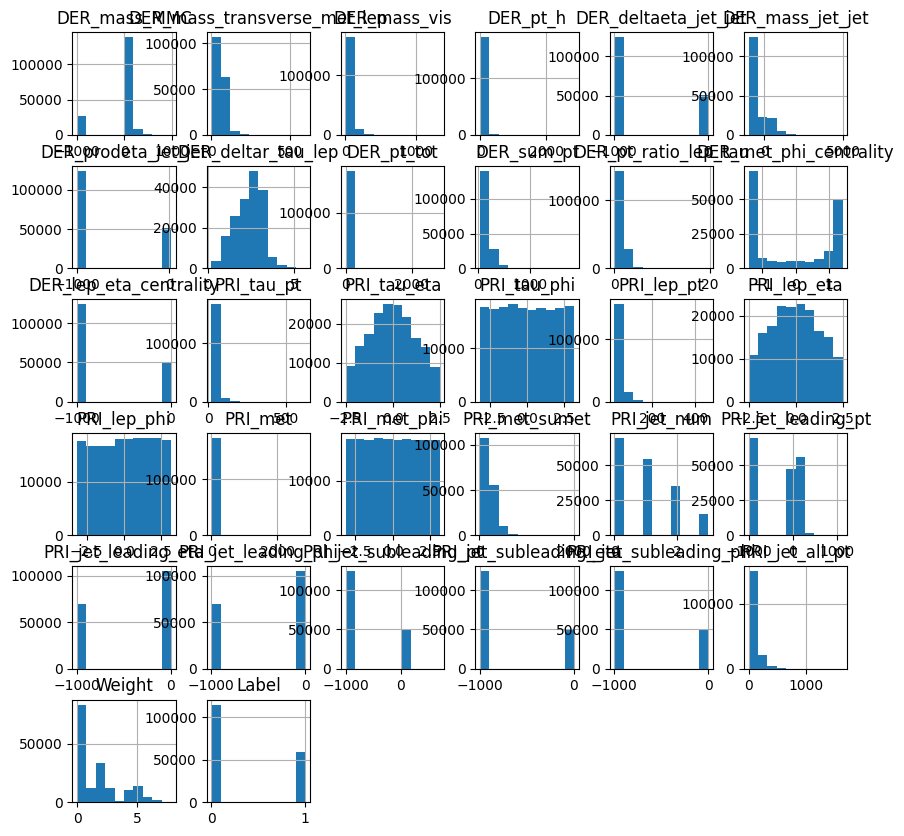

In [129]:
# identify features that basically only have two extreme values
#this might distort the classification because one extreme value might just be associated with one label
sample = data.sample(1000, random_state=42)
#plt.rcParams['font.size'] = 5
data.hist(figsize=(10, 10))
#pyplot.yscale('log')
plt.show()

In [30]:
# Select only numeric columns
numeric_cols = data.select_dtypes(include=['number']).columns

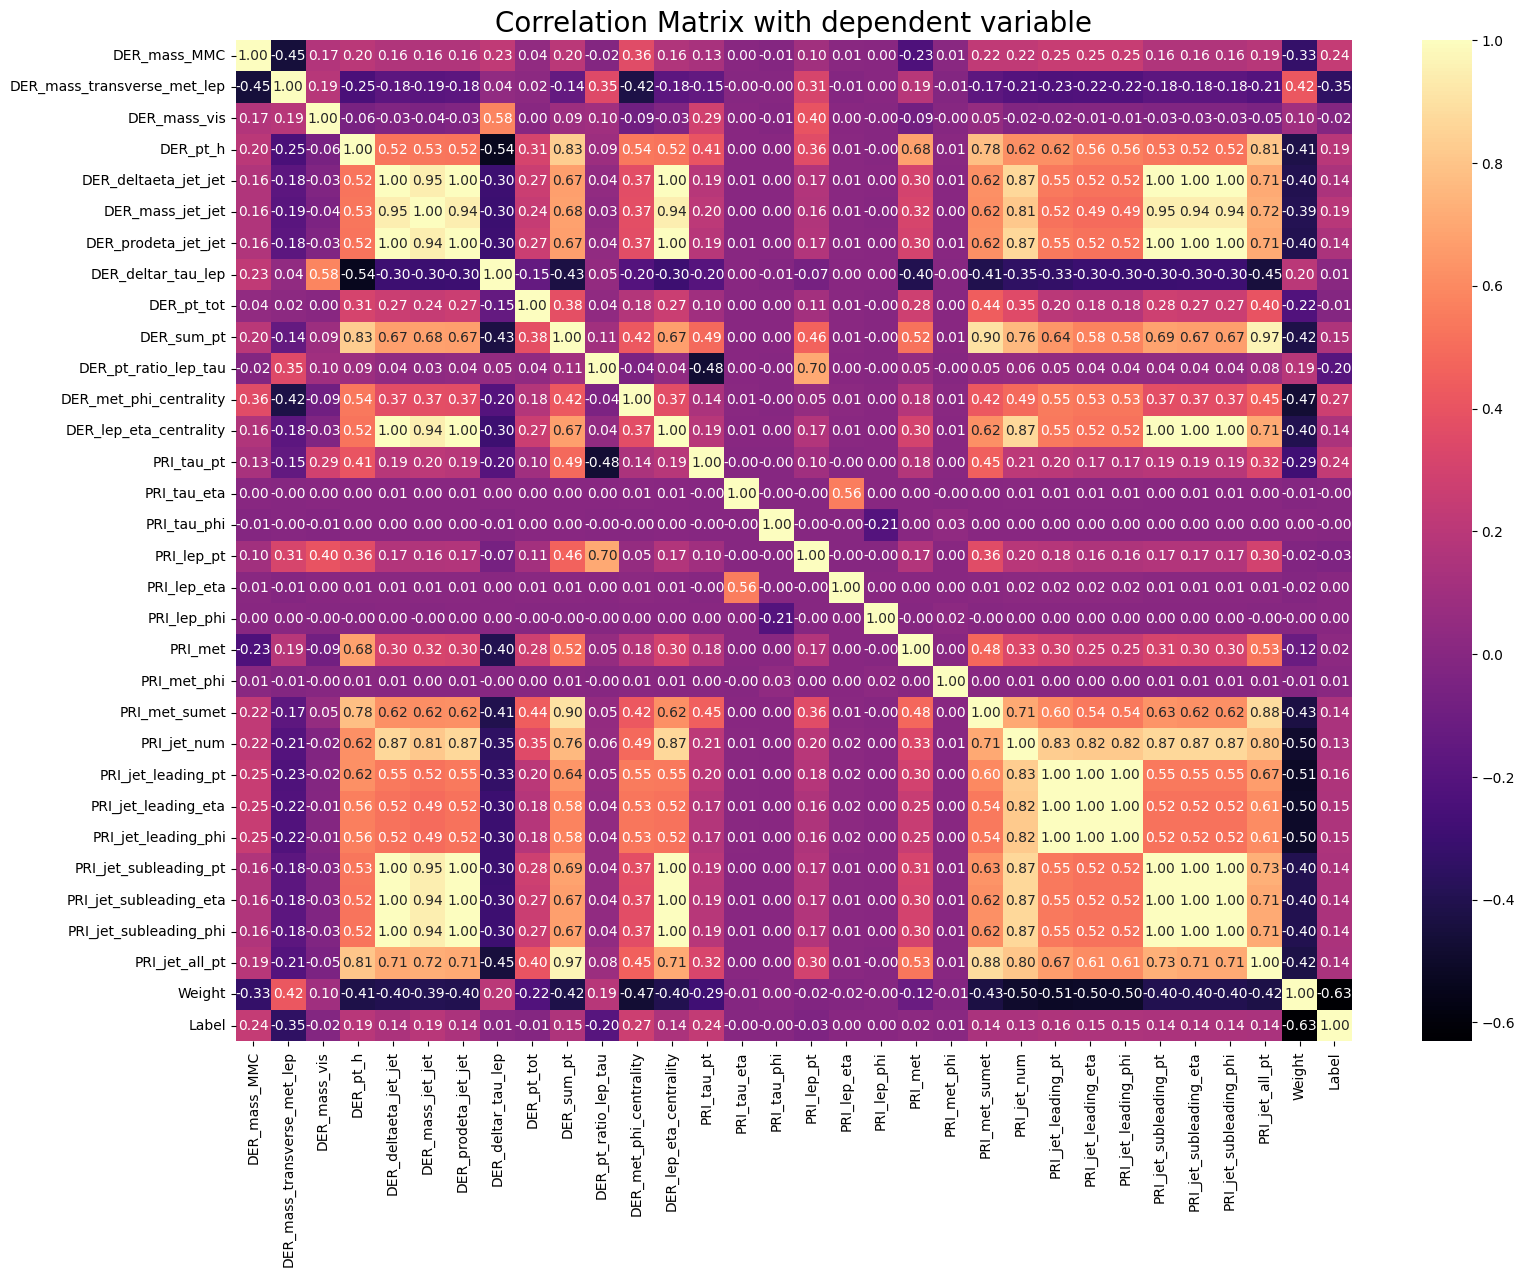

In [ ]:
# Correlation Matrix with dependent variable
import seaborn as sns

f, ax = plt.subplots(figsize=[18, 13])
sns.heatmap(data[numeric_cols].corr(), annot=True, fmt=".2f", ax=ax, cmap="magma")
ax.set_title("Correlation Matrix with dependent variable", fontsize=20)
plt.show()

In [ ]:
def test_balancedness(data, columns):
    for column in columns:
        selection = data[[column, 'Label']].copy()
        median_based_group = selection[selection[column] >= selection[column].median()].groupby('Label').size()

        # Calculate percentages
        total = median_based_group.sum()
        percentages = (median_based_group / total) * 100

        print(column)
        print(percentages)
test_balancedness(data, numeric_cols)

DER_mass_MMC
Label
0    48.086308
1    51.913692
dtype: float64
DER_mass_transverse_met_lep
Label
0    83.338286
1    16.661714
dtype: float64
DER_mass_vis
Label
0    57.309547
1    42.690453
dtype: float64
DER_pt_h
Label
0    57.971429
1    42.028571
dtype: float64
DER_deltaeta_jet_jet
Label
0    65.836571
1    34.163429
dtype: float64
DER_mass_jet_jet
Label
0    65.836571
1    34.163429
dtype: float64
DER_prodeta_jet_jet
Label
0    65.836571
1    34.163429
dtype: float64
DER_deltar_tau_lep
Label
0    64.829177
1    35.170823
dtype: float64
DER_pt_tot
Label
0    66.668571
1    33.331429
dtype: float64
DER_sum_pt
Label
0    56.879193
1    43.120807
dtype: float64
DER_pt_ratio_lep_tau
Label
0    76.863072
1    23.136928
dtype: float64
DER_met_phi_centrality
Label
0    54.098436
1    45.901564
dtype: float64
DER_lep_eta_centrality
Label
0    65.836571
1    34.163429
dtype: float64
PRI_tau_pt
Label
0    52.382857
1    47.617143
dtype: float64
PRI_tau_eta
Label
0    65.893643
1    34.10635

ValueError: ignored

In [ ]:
# PRI_jet_num is int, check distribution over labels
data.groupby('PRI_jet_num')['Label'].size()

KeyboardInterrupt: ignored

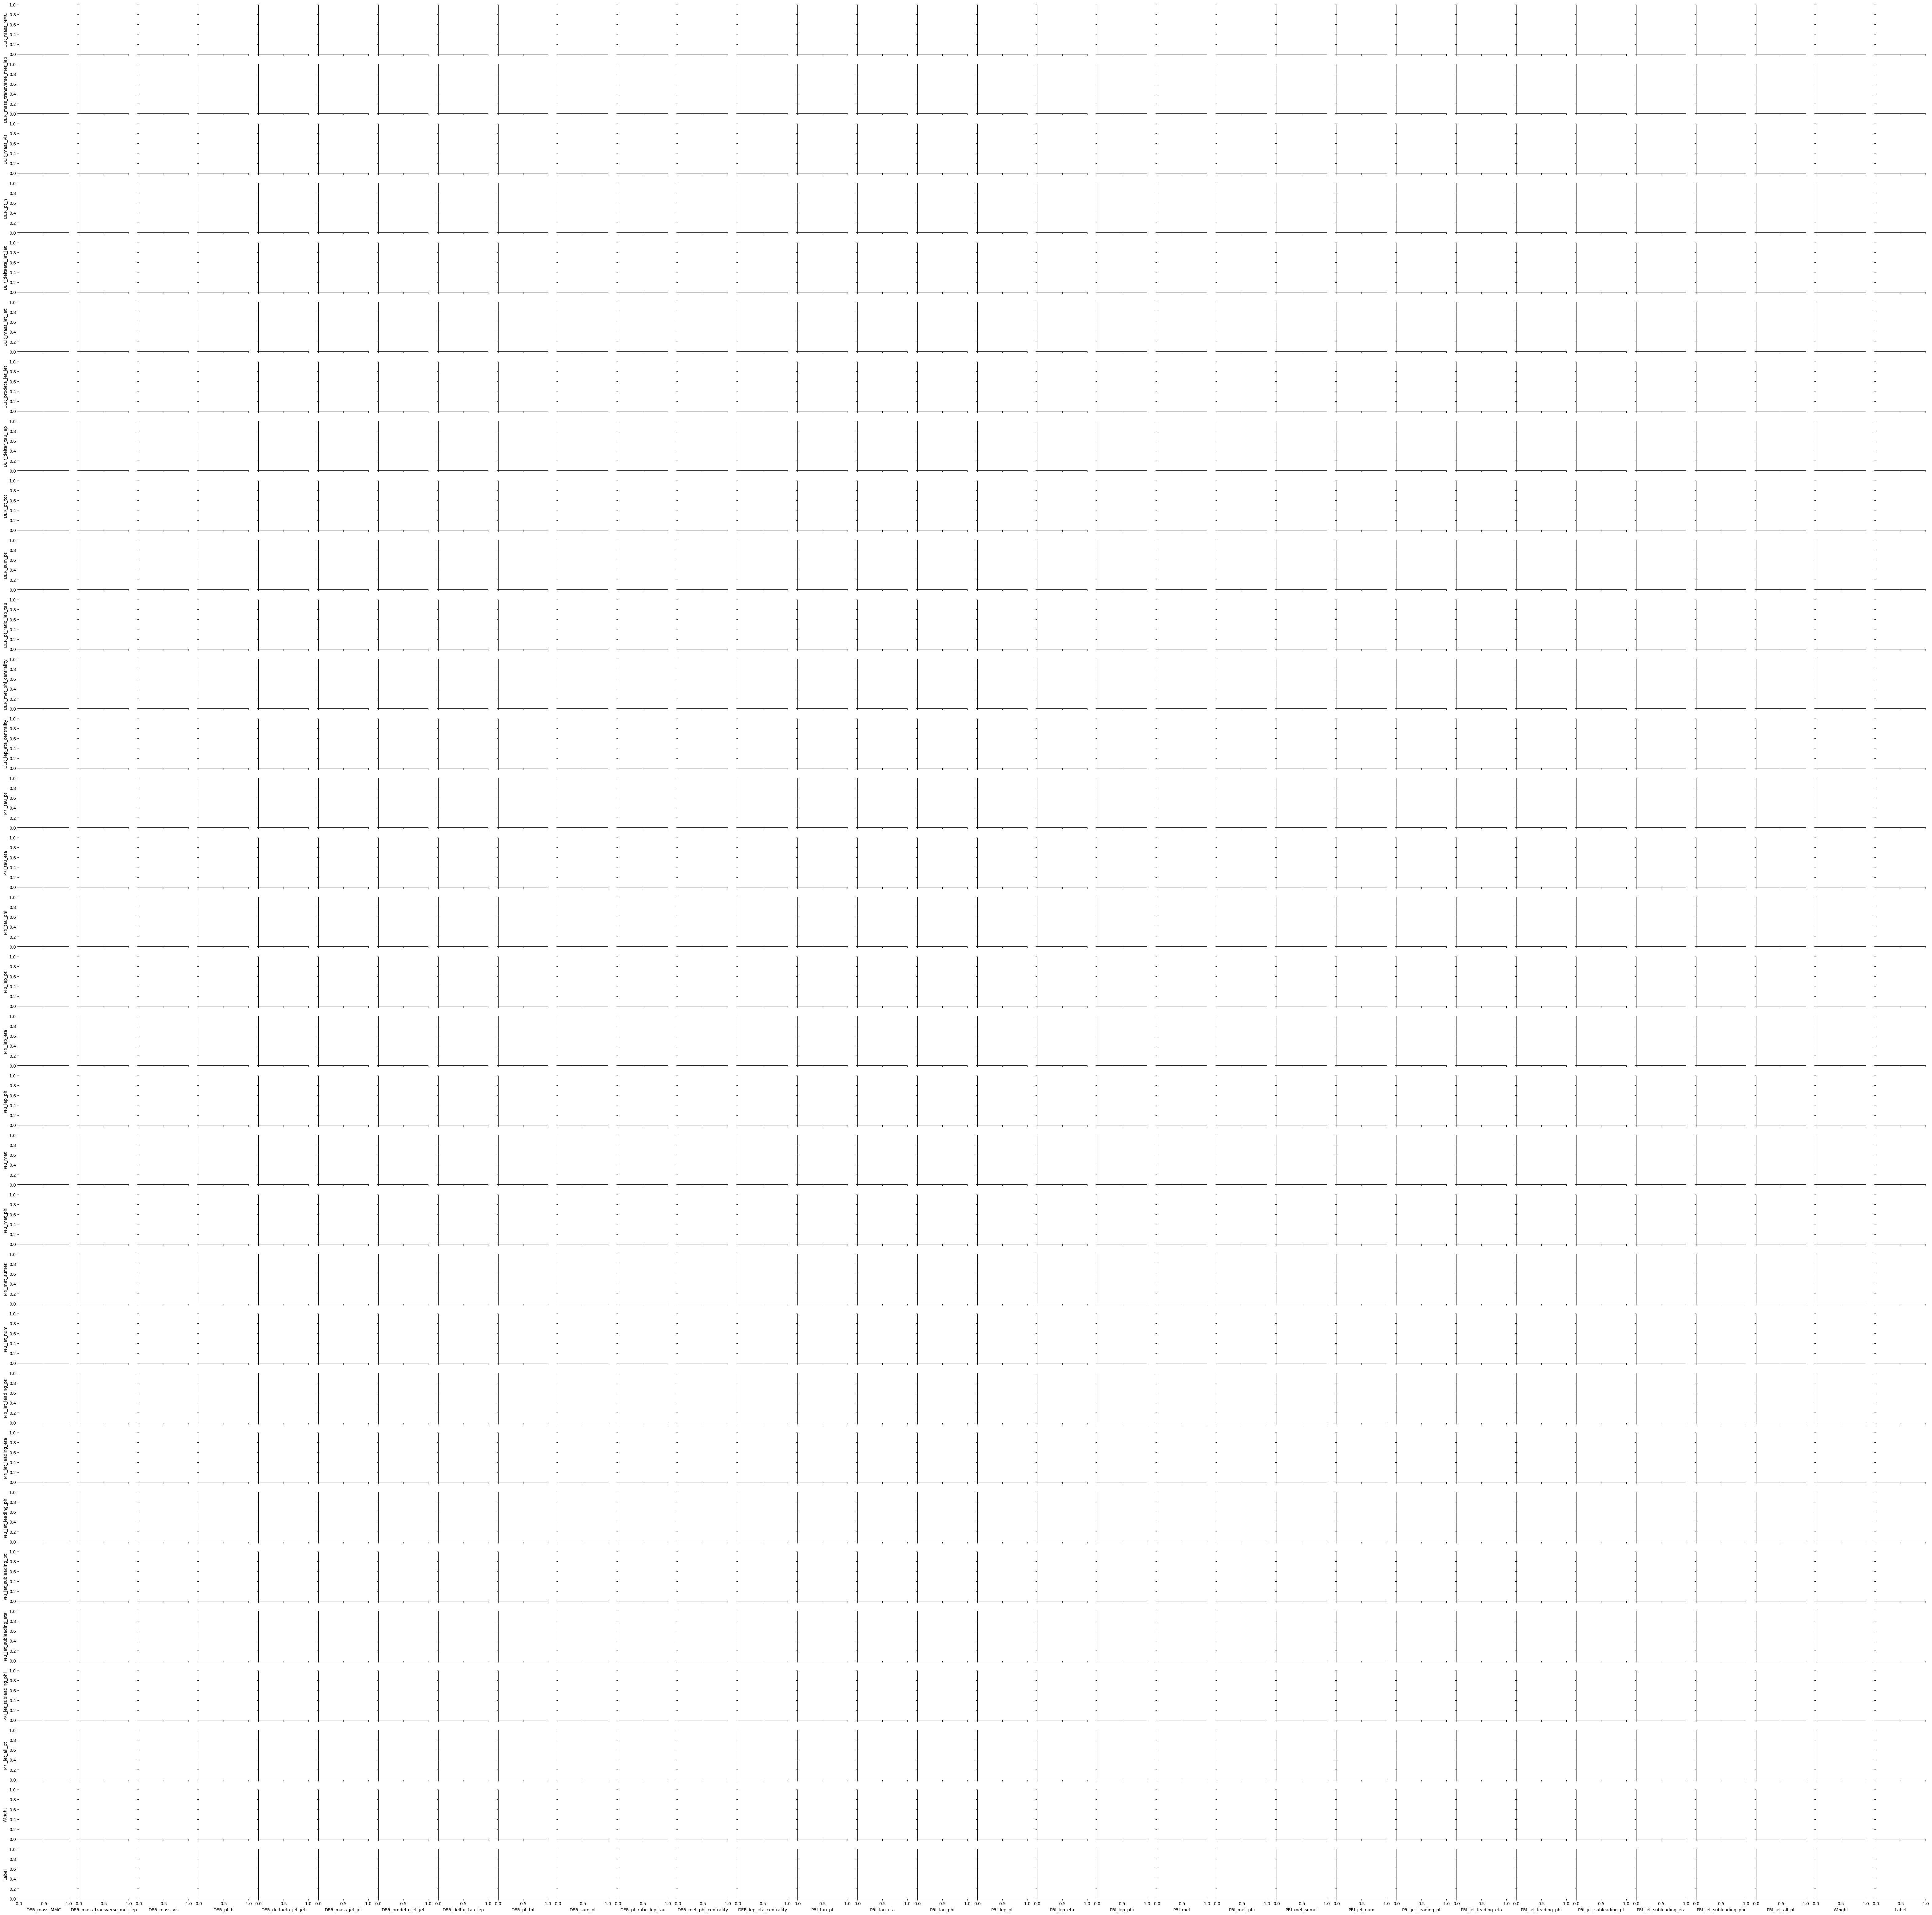

In [20]:
# check for other non-linear relationships between features
# take sample, otherwise too big to plot
higgs_sample = data.sample(1000, random_state=42)
sns.pairplot(higgs_sample)

In [ ]:
# Save the training dataset to a CSV file
data.to_csv('clean_higgs_train.csv', index=False)
print("Training dataset saved as training_dataset.csv")

# Save the test dataset to a CSV file
test_data.to_csv('clean_higgs_test.csv', index=False)
print("Test dataset saved as test_dataset.csv")

Training dataset saved as training_dataset.csv
Test dataset saved as test_dataset.csv


#### Heloc

In [119]:
path = "/content/drive/MyDrive/00 UvA MASTER DATA SCIENCE /05. Applied Machine Learning /benchmark-tabular-ml/"

df_heloc = pd.read_csv(path+"heloc_train.csv")
heloc_test = pd.read_csv(path+"heloc_test.csv")  # adjust path as necessary
test_submission = pd.read_csv(path+"heloc_test_submission.csv")



In [120]:
df_heloc['RiskPerformance'] = df_heloc['RiskPerformance'].replace(('Bad', 'Good'), (0, 1))

data = df_heloc
test_data = heloc_test

In [121]:
data.columns
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9413 entries, 0 to 9412
Data columns (total 24 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   RiskPerformance                     9413 non-null   int64
 1   ExternalRiskEstimate                9413 non-null   int64
 2   MSinceOldestTradeOpen               9413 non-null   int64
 3   MSinceMostRecentTradeOpen           9413 non-null   int64
 4   AverageMInFile                      9413 non-null   int64
 5   NumSatisfactoryTrades               9413 non-null   int64
 6   NumTrades60Ever2DerogPubRec         9413 non-null   int64
 7   NumTrades90Ever2DerogPubRec         9413 non-null   int64
 8   PercentTradesNeverDelq              9413 non-null   int64
 9   MSinceMostRecentDelq                9413 non-null   int64
 10  MaxDelq2PublicRecLast12M            9413 non-null   int64
 11  MaxDelqEver                         9413 non-null   int64
 12  NumTot

,RiskPerformance,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,MSinceMostRecentDelq,...,PercentInstallTrades,MSinceMostRecentInqexcl7days,NumInqLast6M,NumInqLast6Mexcl7days,NetFractionRevolvingBurden,NetFractionInstallBurden,NumRevolvingTradesWBalance,NumInstallTradesWBalance,NumBank2NatlTradesWHighUtilization,PercentTradesWBalance
count,9413.000000,9413.000000,9413.000000,9413.000000,9413.000000,9413.000000,9413.000000,9413.000000,9413.000000,9413.000000,...,9413.000000,9413.000000,9413.000000,9413.000000,9413.000000,9413.000000,9413.000000,9413.000000,9413.000000,9413.000000
mean,0.476787,67.362265,184.131626,8.516945,73.869648,19.352385,0.041007,-0.144481,86.579518,6.796770,...,32.122703,-0.353235,0.862637,0.805800,31.564326,39.007330,3.160948,0.956443,0.003931,62.080102
std,0.499487,21.248076,110.426203,13.337636,38.989435,13.050191,2.532663,2.388159,26.145560,20.545241,...,20.217867,6.072890,3.210913,3.174333,30.054597,42.140626,4.421713,4.085468,3.372328,27.781143
min,0.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,...,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,0.000000,63.000000,117.000000,3.000000,52.000000,11.000000,0.000000,0.000000,87.000000,-7.000000,...,20.000000,-7.000000,0.000000,0.000000,5.000000,-8.000000,2.000000,1.000000,0.000000,48.000000
50%,0.000000,71.000000,177.000000,5.000000,74.000000,19.000000,0.000000,0.000000,96.000000,-7.000000,...,31.000000,0.000000,1.000000,1.000000,25.000000,47.000000,3.000000,2.000000,0.000000,67.000000
75%,1.000000,79.000000,251.000000,11.000000,95.000000,27.000000,1.000000,0.000000,100.000000,14.000000,...,44.000000,1.000000,2.000000,2.000000,54.000000,79.000000,5.000000,3.000000,1.000000,82.000000
max,1.000000,94.000000,803.000000,383.000000,383.000000,79.000000,19.000000,19.000000,100.000000,83.000000,...,100.000000,24.000000,66.000000,66.000000,232.000000,471.000000,32.000000,23.000000,18.000000,100.000000


#### CoverType

In [106]:
path = "/content/drive/MyDrive/00 UvA MASTER DATA SCIENCE /05. Applied Machine Learning /benchmark-tabular-ml/"

df_cov = pd.read_csv(path+"covtype_train.csv")
cov_test = pd.read_csv(path+"covtype_test.csv")  # adjust path as necessary
test_submission = pd.read_csv(path+"covtype_test_submission.csv")


In [107]:

data = df_cov
test_data = cov_test

In [73]:
#data['Cover_Type'] = data['Cover_Type'] - 1


In [101]:
unique_labels = data['Cover_Type'].unique()

# Print the unique labels
print(unique_labels)

[1 2 3 5 6 7 4]


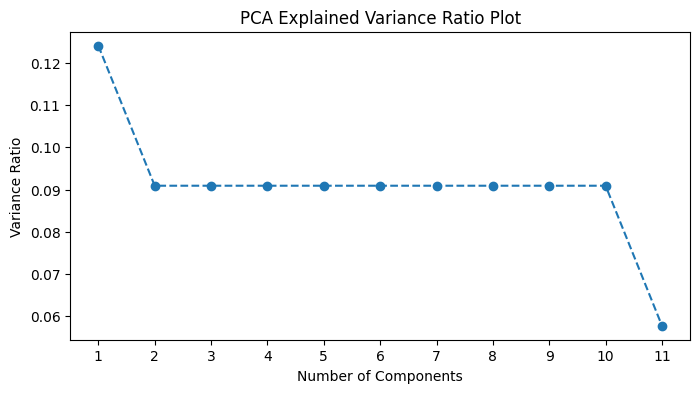

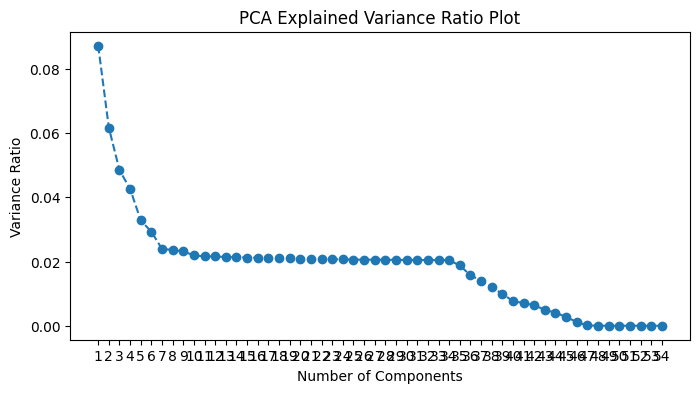

In [102]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Define the function for screeplot and PCA
def perform_pca_and_plot(data):
    # Standardizing the features
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data)

    # Performing PCA without reducing dimensionality to retain all components
    pca = PCA()
    pca.fit(data_scaled)

    # Calculating the explained variance ratio for each component
    explained_variance_ratio = pca.explained_variance_ratio_

    # Plotting the Scree Plot
    plt.figure(figsize=(8, 4))
    plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='--')
    plt.title('PCA Explained Variance Ratio Plot')
    plt.xlabel('Number of Components')
    plt.ylabel('Variance Ratio')
    plt.xticks(range(1, len(explained_variance_ratio) + 1))
    plt.show()

# Call the function on training and test data
perform_pca_and_plot(data)
perform_pca_and_plot(test_data)

In [103]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Define the function to perform PCA
def perform_pca(data, n_components=10):
    # Standardizing the features
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data)

    # Performing PCA
    pca = PCA(n_components=n_components)
    principal_components = pca.fit_transform(data_scaled)

    # Creating a DataFrame with principal components
    column_names = [f'PC{i+1}' for i in range(n_components)]
    pca_df = pd.DataFrame(data=principal_components, columns=column_names)

    # Examining the explained variance
    explained_variance = pca.explained_variance_ratio_
    total_explained_variance = explained_variance.sum()  # Summing the explained variance

    print("Explained Variance per Component: ", explained_variance)
    print("Total Explained Variance: ", total_explained_variance)
    print(pca_df.head())

    return pca_df

# Call the function and store the results
training_data_PCA = perform_pca(data.drop('Cover_Type', axis=1), n_components=10)
y = data['Cover_Type']
data = pd.concat([training_data_PCA, y.reset_index(drop=True)], axis=1)

test_data_PCA = perform_pca(test_data.drop('EventId'), n_components=10)
z = data['EventId']
test_data = pd.concat([test_data_PCA, z.reset_index(drop=True)], axis=1)


Explained Variance per Component:  [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
Total Explained Variance:  1.0000000000000002
        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  0.194923  0.302489  1.650756  0.454873 -0.334062  1.638114 -0.433002   
1 -0.980623 -1.110918 -2.361886 -1.641892 -0.788989 -0.193130  0.914161   
2 -0.744217 -1.084454 -0.688343 -0.030432  0.255243 -0.352848  0.603695   
3  0.199421 -1.588733  1.070221  0.620328  2.580677  0.526018 -1.441608   
4  1.477540 -3.008426  1.175620  0.338222  2.767069 -0.821770 -1.040270   

        PC8       PC9      PC10  
0 -0.776233  1.038369 -0.830197  
1  0.051419  2.089003  0.733524  
2  1.071334 -1.499769 -0.204073  
3  0.772669 -0.799545 -0.004448  
4  0.714297 -2.352875 -1.348832  


KeyError: ignored

#### NN + Smote + Scaling (CoverType)

In [114]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import pandas as pd
import numpy as np

# Separate features and target variable in training data
X_train = data.drop('Cover_Type', axis=1).values
y_train = data['Cover_Type'].values - 1  # Zero-indexing the target
X_test = test_data.values

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply SMOTE
smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

# Simple Neural Network Model
'''class NeuralNet(nn.Module):
    def __init__(self, input_size):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, 256)
        self.relu1 = nn.ReLU()
        self.dropout1 = nn.Dropout(0.5)
        self.fc2 = nn.Linear(256, 128)
        self.relu2 = nn.ReLU()
        self.batchnorm2 = nn.BatchNorm1d(128)
        self.fc3 = nn.Linear(128, 64)
        self.relu3 = nn.ReLU()
        self.fc4 = nn.Linear(64, 7)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.dropout1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.batchnorm2(x)
        x = self.fc3(x)
        x = self.relu3(x)
        x = self.fc4(x)
        return x'''

# More Complex Neural Network
class NeuralNet(nn.Module):
    def __init__(self, input_size):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, 512)  # Increased number of neurons
        self.relu1 = nn.ReLU()
        self.dropout1 = nn.Dropout(0.5)
        self.fc2 = nn.Linear(512, 256)
        self.relu2 = nn.ReLU()
        self.batchnorm2 = nn.BatchNorm1d(256)
        self.fc3 = nn.Linear(256, 128)
        self.relu3 = nn.ReLU()
        self.dropout3 = nn.Dropout(0.3)  # Additional dropout layer
        self.fc4 = nn.Linear(128, 64)
        self.relu4 = nn.ReLU()
        self.fc5 = nn.Linear(64, 32)  # Additional layer
        self.relu5 = nn.ReLU()
        self.fc6 = nn.Linear(32, 7)  # Output layer

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.dropout1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.batchnorm2(x)
        x = self.fc3(x)
        x = self.relu3(x)
        x = self.dropout3(x)
        x = self.fc4(x)
        x = self.relu4(x)
        x = self.fc5(x)
        x = self.relu5(x)
        x = self.fc6(x)
        return x

# Initialize the model
input_size = X_train_smote.shape[1]
model = NeuralNet(input_size)

# Loss and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# DataLoader
train_data = TensorDataset(torch.tensor(X_train_smote, dtype=torch.float32), torch.tensor(y_train_smote, dtype=torch.long))
train_loader = DataLoader(train_data, batch_size=64, shuffle=True)

# Training Loop
num_epochs = 10
for epoch in range(num_epochs):
    for inputs, labels in train_loader:
        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Predictions
model.eval()
test_predictions = []
with torch.no_grad():
    for inputs in DataLoader(torch.tensor(X_test_scaled, dtype=torch.float32), batch_size=64):
        outputs = model(inputs)
        predicted = torch.argmax(outputs, axis=1)
        test_predictions.extend(predicted.numpy())

# Add predictions to test_submission DataFrame
test_submission['pred'] = test_predictions

# Drop the original 'Prediction' column and rename 'pred' to 'Prediction'
test_submission = test_submission.drop('Prediction', axis=1)
test_submission = test_submission.rename(columns={'pred': 'Prediction'})
test_submission['Prediction'] = test_submission['Prediction'] + 1

# Save the updated DataFrame to CSV
test_submission.to_csv('Cov_NN_results(+1).csv', index=False)


Epoch [1/10], Loss: 0.3250
Epoch [2/10], Loss: 0.4842
Epoch [3/10], Loss: 0.5195
Epoch [4/10], Loss: 0.2460
Epoch [5/10], Loss: 0.2393
Epoch [6/10], Loss: 0.1978
Epoch [7/10], Loss: 0.2798
Epoch [8/10], Loss: 0.2509
Epoch [9/10], Loss: 0.2645
Epoch [10/10], Loss: 0.2441


In [110]:
test_submission

,ID,Prediction
0,1,4
1,2,5
2,3,5
3,4,4
4,5,1
...,...,...
3495,3496,3
3496,3497,3
3497,3498,3
3498,3499,2


#### NN + Smote + Scaling (Heloc, Higgs)

In [131]:
test_submission = pd.read_csv("/content/drive/MyDrive/00 UvA MASTER DATA SCIENCE /05. Applied Machine Learning /benchmark-tabular-ml/higgs_test_submission.csv")


In [132]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import pandas as pd

# Assuming df_higgs is your training data and higgs_test is your test data
X_train = data.drop('Label', axis=1).values  # Replace 'label' with your target column name
y_train = data['Label'].values
X_test = test_data.values  # Assuming higgs_test is your test features

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply SMOTE
smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train_smote, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_smote, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)

'''# Neural Network Model
class NeuralNet(nn.Module):
    def __init__(self, input_size):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        return torch.sigmoid(x)'''

class NeuralNet(nn.Module):
    def __init__(self, input_size):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, 256)  # Increased number of neurons
        self.relu1 = nn.ReLU()
        self.dropout1 = nn.Dropout(0.3)  # Added dropout layer for regularization
        self.fc2 = nn.Linear(256, 128)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(128, 64)
        self.relu3 = nn.ReLU()
        self.dropout3 = nn.Dropout(0.3)  # Additional dropout layer
        self.fc4 = nn.Linear(64, 32)  # Additional layer
        self.relu4 = nn.ReLU()
        self.fc5 = nn.Linear(32, 1)  # Output layer

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.dropout1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.fc3(x)
        x = self.relu3(x)
        x = self.dropout3(x)
        x = self.fc4(x)
        x = self.relu4(x)
        x = self.fc5(x)
        return torch.sigmoid(x)

# Usage
model = EnhancedNeuralNet(input_size)  # Where input_size is the number of features in your dataset


# Define the model
input_size = X_train_smote.shape[1]
model = NeuralNet(input_size)

# Loss and Optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# DataLoader
train_data = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_data, batch_size=64, shuffle=True)

# Training Loop
num_epochs = 10
for epoch in range(num_epochs):
    for i, (inputs, labels) in enumerate(train_loader):
        # Forward pass
        outputs = model(inputs)
        labels = labels.unsqueeze(1)  # Adjust labels' shape if necessary
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Predictions
model.eval()
with torch.no_grad():
    test_predictions = model(X_test_tensor)
    test_predictions = (test_predictions >= 0.5).float()  # Convert to binary predictions

# Add predictions to test_submission DataFrame
test_submission['pred'] = test_predictions

# Drop the original 'Prediction' column and rename 'pred' to 'Prediction'
test_submission = test_submission.drop('Prediction', axis=1)
test_submission = test_submission.rename(columns={'pred': 'Prediction'})

# Save the updated DataFrame to CSV
test_submission.to_csv('Heloc_NN_results(complexNN).csv', index=False)


Epoch [1/10], Loss: 0.3289
Epoch [2/10], Loss: 0.0428
Epoch [3/10], Loss: 0.0330
Epoch [4/10], Loss: 0.0250
Epoch [5/10], Loss: 0.0226
Epoch [6/10], Loss: 0.1661
Epoch [7/10], Loss: 0.1237
Epoch [8/10], Loss: 0.0059
Epoch [9/10], Loss: 0.0125
Epoch [10/10], Loss: 0.1212


#### Log Reg including scaling and smote

In [ ]:
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, KFold
import pandas as pd

# Separate features and target variable in training data
X_train = data.drop('Label', axis=1)
y_train = data['Label']

# Prepare test data (assuming higgs_test has the same features as df_higgs)
X_test = test_data  # If higgs_test has no label column, just use higgs_test

# Create a pipeline with StandardScaler, SMOTE, and LogisticRegression
pipeline = ImbPipeline([
    ('scaler', StandardScaler()),
    ('smote', SMOTE()),
    ('logreg', LogisticRegression())
])

# Define the parameter grid to search
param_grid = {
    'logreg__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'logreg__solver': ['liblinear', 'saga']
}

# Create a GridSearchCV object
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring='accuracy',
    cv=KFold(n_splits=3),
    verbose=1
)

# Fit the model on training data
grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: {:.4f}".format(grid_search.best_score_))

# Predict on test data with the best model
best_model = grid_search.best_estimator_
test_predictions = best_model.predict(X_test)

# Create the test submission DataFrame
test_submission = pd.DataFrame({
    #'EventId': higgs_test['EventId'],  # Uncomment and modify if 'EventId' is a column in your test data
    'Predictions': test_predictions
})

# Save the updated DataFrame to CSV
test_submission.to_csv('higgs_logreg_results(smote, scaled).csv', index=False)

print(f"Test data predictions saved")


Fitting 3 folds for each of 12 candidates, totalling 36 fits


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 